## Problem Statement
---

###### Data Link : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

## About Dataset

## Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Attribute Information

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## Problem Objective
---
 - Our objective is to build a ML model to predict whether the customer will be default their payment next month or not, from their past behavious patterns.
 - To build the strategy to convert defaulter into non-deafulter.

## Import Libraries
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset
---

In [ ]:
uci_credit_card = pd.read_csv('https://raw.githubusercontent.com/Ranjith3900/Ranjith_Project_dataset/main/UCI_Credit_Card.csv?token=GHSAT0AAAAAAB7PCMD64ULJK56HVKVP3NMOZAAJCOQ')
uci_credit_card

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Perform Initial Analysis
---

In [ ]:
uci_credit_card.shape

(30000, 25)

In [ ]:
uci_credit_card.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
14061,14062,500000.0,1,1,1,44,-1,-1,-1,-1,...,32530.0,18896.0,17049.0,17410.0,32077.0,32579.0,18914.0,17069.0,16738.0,0
20155,20156,200000.0,2,2,2,38,0,0,0,2,...,1195.0,43115.0,43869.0,1533.0,2395.0,0.0,45000.0,1600.0,2000.0,0
23520,23521,200000.0,2,2,1,36,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2254,2255,240000.0,2,3,1,32,-1,-1,-1,-1,...,1559.0,23506.0,21532.0,1207.0,1357.0,1559.0,23506.0,1603.0,1407.0,0
22940,22941,100000.0,2,1,2,28,0,0,0,0,...,23596.0,24068.0,24679.0,1800.0,2000.0,1400.0,863.0,1000.0,2000.0,0


In [ ]:
uci_credit_card.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [ ]:
uci_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
uci_credit_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Checking for the null values
uci_credit_card.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
# Display the features name
uci_credit_card.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

## Data Exploration and Validation
---

### Variable Segregation

  **1. Categorical Variable/Discrete Variable** - SEX,EDUCATION,MARRIAGE,AGE,(PAY_0 TO PAY_6)

  **2. Continuous Variable** - LIMIT_BAL,(BILL_AMT1 TO BILL_AMT_6),(PAY_AMT1 TO PAY_AMT_6)
  
  **3. Target Variable** - default.payment.next.month

### Discrete Variable Exploration
 - Variable = Sex, Education, Marriage, Age, Pay_0 to Pay_6

 - Using Frequency Table Method

2    18112
1    11888
Name: SEX, dtype: int64


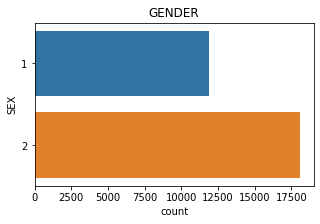

In [ ]:
# Frequency of Sex features
print(uci_credit_card['SEX'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(y='SEX',data=uci_credit_card)
plt.title('GENDER')
plt.show()
# Conclusion - No issues.

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


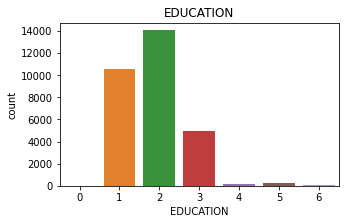

In [ ]:
# Frequency of Education features
print(uci_credit_card['EDUCATION'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='EDUCATION',data=uci_credit_card)
plt.title('EDUCATION')
plt.show()
# Conclusion - 0,5,6 are undocumented issues. We should 0,5,6 to be put in others which is 4.

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


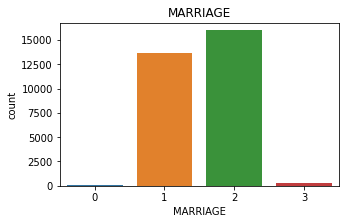

In [ ]:
# Frequency of Marriage features
print(uci_credit_card['MARRIAGE'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='MARRIAGE',data=uci_credit_card)
plt.title('MARRIAGE')
plt.show()
# Conclusion - 0 is undocumented issue. We should 0 to be put in others which is 3.

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64


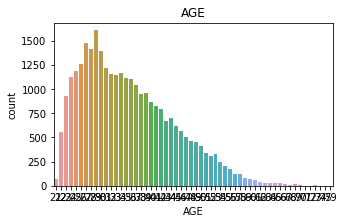

In [ ]:
# Frequency of Age features
print(uci_credit_card['AGE'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='AGE',data=uci_credit_card)
plt.title('AGE')
plt.show()
# Conclusion - No issue.

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


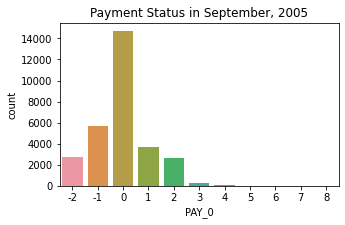

In [ ]:
# Frequency of each category in PAY_0 feature
print(uci_credit_card['PAY_0'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='PAY_0',data=uci_credit_card)
plt.title('Payment Status in September, 2005')
plt.show()
# Conclusion - 0 is no meaning in data dictionary. so it can be considered as an outlier/default values.

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


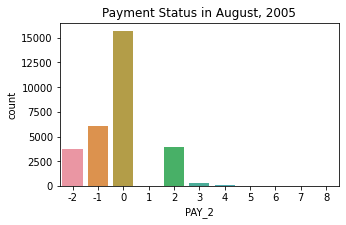

In [ ]:
# Frequency of each category in PAY_2 feature
print(uci_credit_card['PAY_2'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='PAY_2',data=uci_credit_card)
plt.title('Payment Status in August, 2005')
plt.show()
# Conclusion - 0 is no meaning in data dictionary. so it can be considered as an outlier/default values.

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


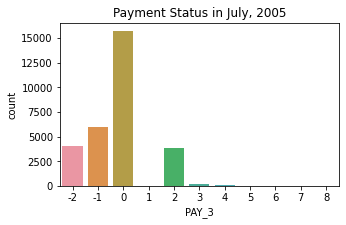

In [ ]:
# Frequency of each category in PAY_3 feature
print(uci_credit_card['PAY_3'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='PAY_3',data=uci_credit_card)
plt.title('Payment Status in July, 2005')
plt.show()
# Conclusion - 0 is no meaning in data dictionary. so it can be considered as an outlier/default values

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64


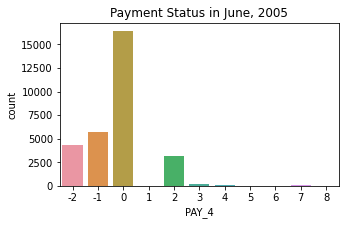

In [ ]:
# Frequency of each category in PAY_4 feature
print(uci_credit_card['PAY_4'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='PAY_4',data=uci_credit_card)
plt.title('Payment Status in June, 2005')
plt.show()
# Conclusion - 0 is no meaning in data dictionary. so it can be considered as an outlier/default values

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64


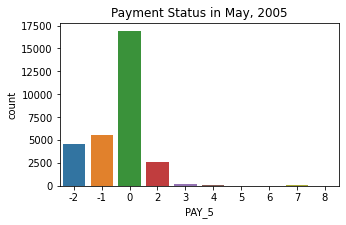

In [ ]:
# Frequency of each category in PAY_5 feature
print(uci_credit_card['PAY_5'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='PAY_5',data=uci_credit_card)
plt.title('Payment Status in May, 2005')
plt.show()
# Conclusion - 0 is no meaning in data dictionary. so it can be considered as an outlier/default values

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


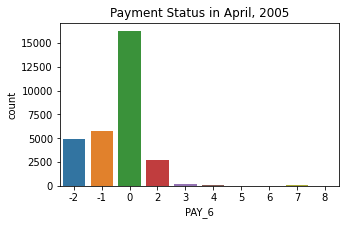

In [ ]:
# Frequency of each category in PAY_6 feature
print(uci_credit_card['PAY_6'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='PAY_6',data=uci_credit_card)
plt.title('Payment Status in April, 2005')
plt.show()
# Conclusion - 0 is no meaning in data dictionary. so it can be considered as an outlier/default values

### Continuous Variable Exploration
 - Variable = LIMIT_BAL,(BILL_AMT1 TO BILL_AMT_6),(PAY_AMT1 TO PAY_AMT_6)

 - Using Boxplot/Percentile Methods.

In [ ]:
uci_credit_card.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [ ]:
uci_credit_card['LIMIT_BAL'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99,1])

0.00      10000.0
0.10      30000.0
0.20      50000.0
0.30      70000.0
0.40     100000.0
0.50     140000.0
0.60     180000.0
0.70     210000.0
0.80     270000.0
0.90     360000.0
0.92     380000.0
0.94     410000.0
0.96     460000.0
0.97     500000.0
0.98     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

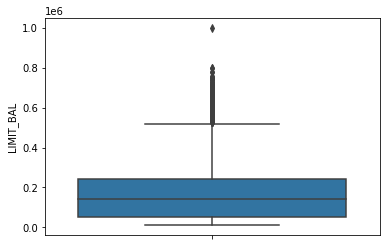

In [ ]:
# Boxplot of LIMIT_BAL
sns.boxplot(y='LIMIT_BAL',data=uci_credit_card)
plt.show()

In [ ]:
uci_credit_card[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00
0.20,1892.80,1472.80,1187.80,988.00,763.00,476.00
0.30,6050.40,5500.00,5219.20,4643.70,3637.00,2701.70
0.40,13469.20,12799.60,12197.20,11145.00,9809.20,8770.20
0.50,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00
0.60,37045.20,34773.80,31401.00,28604.40,26690.40,25508.40
0.70,52204.90,50690.00,49217.30,45456.60,40943.20,39252.20
0.80,83421.20,80292.20,76777.40,70579.00,65823.00,63150.60
0.90,142133.70,136905.50,132051.30,122418.70,115883.00,112110.40


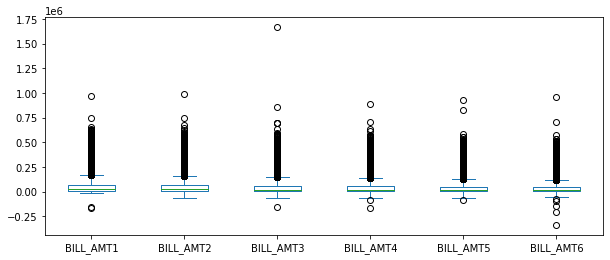

In [ ]:
# Boxplot on each features
uci_credit_card[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box',figsize=(10,4))

In [ ]:
uci_credit_card[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99,1])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.10,0.00,0.00,0.00,0.00,0.00,0.00
0.20,316.00,268.80,2.80,0.00,0.00,0.00
0.30,1263.70,1165.00,780.00,500.00,500.00,426.00
0.40,1724.00,1600.00,1206.00,1000.00,1000.00,1000.00
0.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
0.60,3000.00,3000.00,2500.00,2100.00,2123.40,2100.00
0.70,4309.30,4045.30,3560.30,3200.00,3200.00,3200.00
0.80,6192.20,6000.00,5284.00,5000.00,5000.00,5000.00
0.90,10300.00,10401.10,10000.00,9570.60,9500.00,9600.00


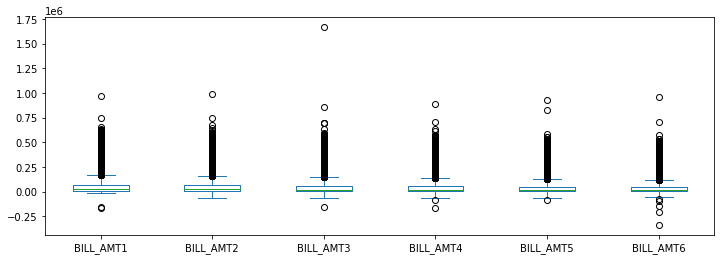

In [ ]:
uci_credit_card[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box',figsize=(12,4))

## Data Cleaning
---

### Discrete Variable Data Cleaning

In [ ]:
# Frequency of each category
uci_credit_card['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Crosstab with target variable
cross_tab_edu = pd.crosstab(uci_credit_card['EDUCATION'],uci_credit_card['default.payment.next.month'])
cross_tab_edu

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [ ]:
# Crosstab of row percentage
cross_tab_edu_1 = cross_tab_edu.apply(lambda x:x/x.sum(),axis=1)
round(cross_tab_edu_1,2)

default.payment.next.month,0,1
EDUCATION,,
0,1.00,0.00
1,0.81,0.19
2,0.76,0.24
3,0.75,0.25
4,0.94,0.06
5,0.94,0.06
6,0.84,0.16


In [ ]:
# Imputation based on Target variable
# Category 0,5,6 are undocumented so we can put into category 4 and 1.
uci_credit_card['EDUCATION'][uci_credit_card['EDUCATION']==5] = 4
uci_credit_card['EDUCATION'][uci_credit_card['EDUCATION'].isin([0,6])] = 1
uci_credit_card['EDUCATION'].value_counts()

2    14030
1    10650
3     4917
4      403
Name: EDUCATION, dtype: int64

In [ ]:
# Frequency of each values
uci_credit_card['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
# Crosstab with Target variable
cross_tab_marriage = pd.crosstab(uci_credit_card['MARRIAGE'],uci_credit_card['default.payment.next.month'])
cross_tab_marriage

default.payment.next.month,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [ ]:
# Crosstab of row percentage
cross_tab_marriage1 = cross_tab_marriage.apply(lambda x:x/x.sum(),axis=1)
cross_tab_marriage1.round(2)

default.payment.next.month,0,1
MARRIAGE,,
0,0.91,0.09
1,0.77,0.23
2,0.79,0.21
3,0.74,0.26


In [ ]:
# Category 0 is undocumented. So we should 0 to be put into category 3 mentioned as others.
# Imputation based on Target variable
uci_credit_card['MARRIAGE'][uci_credit_card['MARRIAGE']==0] = 3
uci_credit_card['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
# Frequency of each values
uci_credit_card['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
# Crosstab with Target variable
cross_tab_pay2 = pd.crosstab(uci_credit_card['PAY_2'],uci_credit_card['default.payment.next.month'])
cross_tab_pay2

default.payment.next.month,0,1
PAY_2,,
-2,3091,691
-1,5084,966
0,13227,2503
1,23,5
2,1743,2184
3,125,201
4,49,50
5,10,15
6,3,9


In [ ]:
# Crosstab of row percentage
cross_tab_pay2 = cross_tab_pay2.apply(lambda x:x/x.sum(),axis=1)
round(cross_tab_pay2,2)

default.payment.next.month,0,1
PAY_2,,
-2,0.82,0.18
-1,0.84,0.16
0,0.84,0.16
1,0.82,0.18
2,0.44,0.56
3,0.38,0.62
4,0.49,0.51
5,0.40,0.60
6,0.25,0.75


In [ ]:
# Category -2,-1,0 are convert into category 0 for pay duly
# Imputation based on Target variable.
uci_credit_card['PAY_0'][(uci_credit_card['PAY_0']==-2) | (uci_credit_card['PAY_0']==-1) | (uci_credit_card['PAY_0']==0)] = 0
uci_credit_card['PAY_2'][(uci_credit_card['PAY_2']==-2) | (uci_credit_card['PAY_2']==-1) | (uci_credit_card['PAY_2']==0)] = 0
uci_credit_card['PAY_3'][(uci_credit_card['PAY_3']==-2) | (uci_credit_card['PAY_3']==-1) | (uci_credit_card['PAY_3']==0)] = 0
uci_credit_card['PAY_4'][(uci_credit_card['PAY_4']==-2) | (uci_credit_card['PAY_4']==-1) | (uci_credit_card['PAY_4']==0)] = 0
uci_credit_card['PAY_5'][(uci_credit_card['PAY_5']==-2) | (uci_credit_card['PAY_5']==-1) | (uci_credit_card['PAY_5']==0)] = 0
uci_credit_card['PAY_6'][(uci_credit_card['PAY_6']==-2) | (uci_credit_card['PAY_6']==-1) | (uci_credit_card['PAY_6']==0)] = 0

In [ ]:
# Discrete variable cleaned data
uci_credit_card.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
7716,7717,130000.0,2,2,1,43,0,0,0,0,...,97685.0,80733.0,82883.0,5008.0,6003.0,4000.0,3000.0,4870.0,3000.0,0
21681,21682,20000.0,2,1,2,24,0,0,0,0,...,19883.0,19293.0,19993.0,1300.0,1332.0,1301.0,700.0,1000.0,900.0,0
28712,28713,180000.0,2,2,1,42,0,0,0,0,...,111343.0,91966.0,82280.0,6167.0,5800.0,5700.0,3600.0,3000.0,3234.0,0
5032,5033,20000.0,2,1,2,23,0,0,0,0,...,16346.0,16837.0,18298.0,2000.0,2000.0,1000.0,1000.0,2000.0,2000.0,0
442,443,30000.0,2,1,2,26,1,0,0,0,...,0.0,197.0,2995.0,0.0,945.0,0.0,197.0,2995.0,0.0,0


### Continuous variable Data Cleaning

In [ ]:
# Find the percentile of BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 features
uci_credit_card[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].quantile([0,0.01,0.02,0.03,0.04,0.05,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.98,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00
0.20,1892.80,1472.80,1187.80,988.00,763.00,476.00


In [ ]:
median_bill_1 = uci_credit_card['BILL_AMT1'].median()
median_bill_1

22381.5

In [ ]:
# Treating the 2% negative outlier present in the all BILL_AMT, so we should do imputation based on the median values of the ngative values.
uci_credit_card['BILL_AMT1'][uci_credit_card['BILL_AMT1']<0] = median_bill_1
uci_credit_card['BILL_AMT2'][uci_credit_card['BILL_AMT2']<0] = uci_credit_card['BILL_AMT2'].median()
uci_credit_card['BILL_AMT3'][uci_credit_card['BILL_AMT3']<0] = uci_credit_card['BILL_AMT3'].median()
uci_credit_card['BILL_AMT4'][uci_credit_card['BILL_AMT4']<0] = uci_credit_card['BILL_AMT4'].median()
uci_credit_card['BILL_AMT5'][uci_credit_card['BILL_AMT5']<0] = uci_credit_card['BILL_AMT5'].median()
uci_credit_card['BILL_AMT6'][uci_credit_card['BILL_AMT6']<0] = uci_credit_card['BILL_AMT6'].median()

0.0         2008
22381.5      590
390.0        244
780.0         76
326.0         72
            ... 
146034.0       1
20817.0        1
1351.0         1
17068.0        1
47929.0        1
Name: BILL_AMT1, Length: 22418, dtype: int64


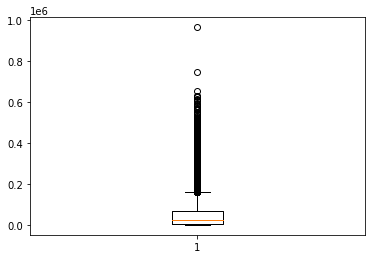

In [ ]:
print(uci_credit_card['BILL_AMT1'].value_counts())
plt.boxplot(x='BILL_AMT1', data=uci_credit_card)
plt.show()

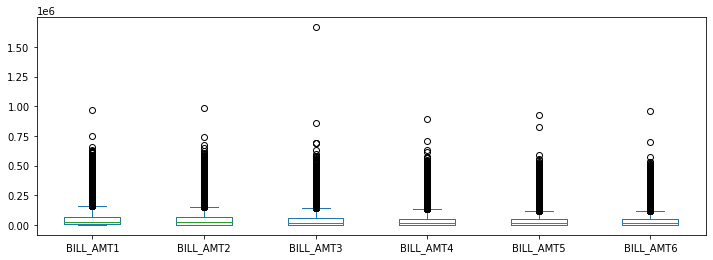

In [ ]:
uci_credit_card[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box',figsize=(12,4))

In [ ]:
# Treating the 1% positive outlier present in the all BILL_AMT, so we should do imputation based on the median values of that values.
uci_credit_card['BILL_AMT1'][uci_credit_card['BILL_AMT1']>350110.68] = median_bill_1
uci_credit_card['BILL_AMT2'][uci_credit_card['BILL_AMT2']>337495.28] = uci_credit_card['BILL_AMT2'].median()
uci_credit_card['BILL_AMT3'][uci_credit_card['BILL_AMT3']>325030.39] = uci_credit_card['BILL_AMT3'].median()
uci_credit_card['BILL_AMT4'][uci_credit_card['BILL_AMT4']>304997.27] = uci_credit_card['BILL_AMT4'].median()
uci_credit_card['BILL_AMT5'][uci_credit_card['BILL_AMT5']>285868.33] = uci_credit_card['BILL_AMT5'].median()
uci_credit_card['BILL_AMT6'][uci_credit_card['BILL_AMT6']>279505.06] = uci_credit_card['BILL_AMT6'].median()

0.0        2008
22381.5     890
390.0       244
780.0        76
326.0        72
           ... 
20817.0       1
1351.0        1
17068.0       1
3304.0        1
47929.0       1
Name: BILL_AMT1, Length: 22119, dtype: int64


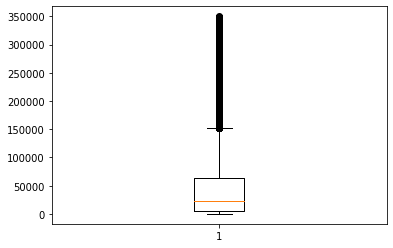

In [ ]:
print(uci_credit_card['BILL_AMT1'].value_counts())
plt.boxplot(x='BILL_AMT1', data=uci_credit_card)
plt.show()

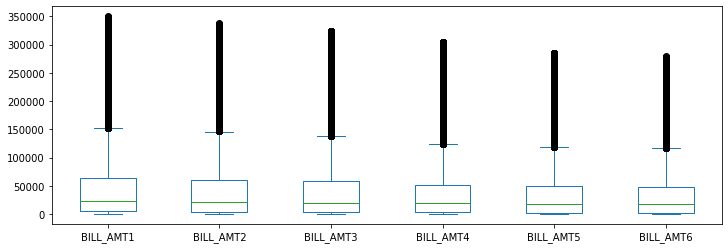

In [ ]:
uci_credit_card[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box',figsize=(12,4))

In [ ]:
# Find the percentile of PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 features
uci_credit_card[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99,1])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.10,0.00,0.00,0.00,0.00,0.00,0.00
0.20,316.00,268.80,2.80,0.00,0.00,0.00
0.30,1263.70,1165.00,780.00,500.00,500.00,426.00
0.40,1724.00,1600.00,1206.00,1000.00,1000.00,1000.00
0.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
0.60,3000.00,3000.00,2500.00,2100.00,2123.40,2100.00
0.70,4309.30,4045.30,3560.30,3200.00,3200.00,3200.00
0.80,6192.20,6000.00,5284.00,5000.00,5000.00,5000.00
0.90,10300.00,10401.10,10000.00,9570.60,9500.00,9600.00


In [ ]:
# Treating 1% extreme outlier by imputation based on the median value of that column
uci_credit_card['PAY_AMT1'][uci_credit_card['PAY_AMT1']>66522.18]=uci_credit_card['PAY_AMT1'].median()
uci_credit_card['PAY_AMT2'][uci_credit_card['PAY_AMT2']>76651.02]=uci_credit_card['PAY_AMT2'].median()
uci_credit_card['PAY_AMT3'][uci_credit_card['PAY_AMT3']>70000.00]=uci_credit_card['PAY_AMT3'].median()
uci_credit_card['PAY_AMT4'][uci_credit_card['PAY_AMT4']>67054.44]=uci_credit_card['PAY_AMT4'].median()
uci_credit_card['PAY_AMT5'][uci_credit_card['PAY_AMT5']>65607.56]=uci_credit_card['PAY_AMT5'].median()
uci_credit_card['PAY_AMT6'][uci_credit_card['PAY_AMT6']>82619.05]=uci_credit_card['PAY_AMT6'].median()

0.0        5249
2000.0     1363
3000.0      891
5000.0      698
1500.0      507
           ... 
41300.0       1
16004.0       1
13492.0       1
6901.0        1
9054.0        1
Name: PAY_AMT1, Length: 7677, dtype: int64


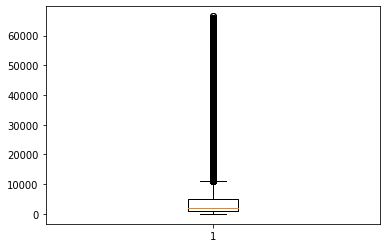

In [ ]:
print(uci_credit_card['PAY_AMT1'].value_counts())
plt.boxplot(x='PAY_AMT1', data=uci_credit_card)
plt.show()

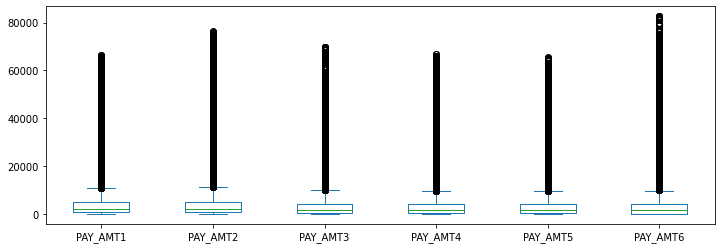

In [ ]:
uci_credit_card[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box',figsize=(12,4))

In [ ]:
# Find the percentile of LIMIT_BAL
uci_credit_card['LIMIT_BAL'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99,1])

0.00      10000.0
0.10      30000.0
0.20      50000.0
0.30      70000.0
0.40     100000.0
0.50     140000.0
0.60     180000.0
0.70     210000.0
0.80     270000.0
0.90     360000.0
0.92     380000.0
0.94     410000.0
0.96     460000.0
0.97     500000.0
0.98     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

In [ ]:
# Treating 1% positive outlier by imputation based on the median value of that column
uci_credit_card['LIMIT_BAL'][uci_credit_card['LIMIT_BAL']>500000] = uci_credit_card['LIMIT_BAL'].median()
uci_credit_card['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

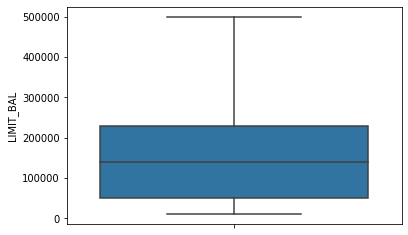

In [ ]:
# Boxplot on LIMIT_BAL
sns.boxplot(y='LIMIT_BAL',data=uci_credit_card)
plt.show()

In [ ]:
# Rename the PAY_0 as PAY_1 and default.payment.next.month as DEFAULT_PAYMENT
uci_credit_card.rename(columns = {'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT_PAYMENT'},inplace=True)
uci_credit_card.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
8387,8388,30000.0,1,2,2,28,0,0,0,0,...,18585.0,0.0,0.0,2000.0,2000.0,2000.0,0.0,0.0,0.0,0
26459,26460,20000.0,2,2,1,49,0,0,0,0,...,16300.0,16624.0,16974.0,1543.0,1260.0,1270.0,594.0,617.0,1425.0,1
2694,2695,30000.0,1,2,2,33,1,2,0,0,...,29304.0,28996.0,28970.0,0.0,1753.0,1200.0,1041.0,1194.0,1100.0,0
27368,27369,30000.0,1,2,2,29,1,2,0,0,...,25517.0,25896.0,26282.0,0.0,1715.0,1700.0,1100.0,952.0,958.0,0
17870,17871,10000.0,1,2,1,28,0,0,0,0,...,4642.0,5642.0,6342.0,1196.0,1300.0,1000.0,1000.0,700.0,1208.0,0
28007,28008,250000.0,2,2,1,25,0,0,0,0,...,22408.0,20610.0,17978.0,2000.0,1790.0,1250.0,700.0,644.0,1000.0,0
22381,22382,410000.0,2,1,2,30,0,0,0,0,...,2830.0,0.0,0.0,8417.0,0.0,2830.0,0.0,0.0,500.0,0
12243,12244,140000.0,2,1,2,34,0,0,0,0,...,48244.0,36206.0,38021.0,3005.0,3004.0,4010.0,3002.0,3000.0,10010.0,1
28229,28230,400000.0,2,2,2,35,2,0,0,0,...,223350.0,213831.0,210563.0,50016.0,2009.0,10071.0,8037.0,8018.0,8809.0,1
3269,3270,20000.0,2,2,1,45,0,0,0,0,...,18662.0,0.0,0.0,2500.0,3000.0,1000.0,0.0,0.0,0.0,0


In [ ]:
# Create the new dataset from on existing dataset
uci_credit_card_new = uci_credit_card.copy()
pd.set_option('display.max_columns',None)
uci_credit_card_new.head(11)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.00,0.0,0.00,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.00,3272.0,3455.00,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.00,14331.0,14948.00,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.00,28314.0,28959.00,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.00,20940.0,19146.00,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.00,19394.0,19619.00,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,22381.5,21201.5,20088.75,19052.0,18104.75,17072.5,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,0,0,0,0,0,11876.0,380.0,601.00,221.0,18104.50,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.00,12211.0,11793.00,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,0,0,0.0,0.0,0.00,0.0,13007.00,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


## Model Building - Logistic Regression
---

In [ ]:
# Defining features and labels

features = uci_credit_card_new.drop('DEFAULT_PAYMENT',axis='columns')
print(features.columns.values)

X = uci_credit_card_new[features.columns.values]
print('X shape',X.shape)
Y = uci_credit_card_new['DEFAULT_PAYMENT']
print('Y shape',Y.shape)

['ID' 'LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_1' 'PAY_2'
 'PAY_3' 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3'
 'BILL_AMT4' 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3'
 'PAY_AMT4' 'PAY_AMT5' 'PAY_AMT6']
X shape (30000, 24)
Y shape (30000,)


In [ ]:
# Import packages
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data into Train data (80%) and Test data (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Checking the shape of Train data and Test data
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('Y_train',y_train.shape)
print('Y_test',y_test.shape)

X_train (24000, 24)
X_test (6000, 24)
Y_train (24000,)
Y_test (6000,)


In [ ]:
# Model building
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train,y_train)
LogisticRegression(max_iter=2000)

# Coefficient and Intercept
print('Coefficient : ',logistic.coef_)
print('Intercept :',logistic.intercept_)

Coefficient :  [[-2.31181020e-05 -3.49375965e-06 -3.94885182e-07 -4.24704149e-07
  -4.56838712e-07 -5.24171353e-06  1.11944525e-06  8.86489150e-07
   7.50781029e-07  6.95498982e-07  6.26448147e-07  5.71219955e-07
  -2.98256135e-06  6.97127797e-07 -2.42262897e-07  4.00574920e-06
  -5.24664765e-07  3.17839853e-06 -3.68219384e-05 -4.02706471e-05
  -2.07726971e-05 -1.32159788e-05 -1.80969495e-05 -1.00498987e-05]]
Intercept : [-2.07099515e-07]


In [ ]:
# Predicting the target variable
predict1 = logistic.predict(x_test)
print(predict1)

[0 0 0 ... 0 0 0]


## Model Vaildation
---

### Confusion Matrix

In [ ]:
# Import packages
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm1 = confusion_matrix(y_test,predict1)
print(cm1)

#Calculate accuracy
total1 = sum(sum(cm1))
print('cm_total : ',total1)
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy : ',round(accuracy1*100,2))

[[4625    0]
 [1375    0]]
cm_total :  6000
Accuracy :  77.08


### Checking for Multicollinearity
- If the VIF<5 means independent variable so we can keep the variable.
- if the VIF >= 5 means dependent variable so we should drop the variable sequentialy

In [ ]:
# Import library
import statsmodels.formula.api as sm

#checking for multicollinearity
def vif_cal(input_data, dependent_col):
    x_vars = input_data
    xvars_names = x_vars.columns
    for i in range(0, xvars_names.shape[0]):
        y = x_vars[xvars_names[i]]
        x = x_vars[xvars_names.drop(xvars_names[i])]
        rsq = sm.ols(formula= 'y~x',data=x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvars_names[i],"VIF = ",vif)

In [ ]:
vif_cal(input_data=x_train,dependent_col='DEFAULT_PAYMENT')

ID VIF =  1.01
LIMIT_BAL VIF =  1.36
SEX VIF =  1.02
EDUCATION VIF =  1.13
MARRIAGE VIF =  1.23
AGE VIF =  1.27
PAY_1 VIF =  2.03
PAY_2 VIF =  2.64
PAY_3 VIF =  2.55
PAY_4 VIF =  2.97
PAY_5 VIF =  3.24
PAY_6 VIF =  2.29
BILL_AMT1 VIF =  6.89
BILL_AMT2 VIF =  11.09
BILL_AMT3 VIF =  9.34
BILL_AMT4 VIF =  8.46
BILL_AMT5 VIF =  9.79
BILL_AMT6 VIF =  6.82
PAY_AMT1 VIF =  1.36
PAY_AMT2 VIF =  1.36
PAY_AMT3 VIF =  1.31
PAY_AMT4 VIF =  1.33
PAY_AMT5 VIF =  1.32
PAY_AMT6 VIF =  1.21


**Note:-**
- If the VIF<5 means independent variable so we can keep the variable.
- if the VIF >= 5 means dependent variable so should drop the variable sequentialy

In [ ]:
# Drop the BILL_AMT5 variable because VIF >= 5.
vif_cal(input_data=x_train.drop('BILL_AMT5',axis=1),dependent_col='DEFAULT_PAYMENT')

ID VIF =  1.01
LIMIT_BAL VIF =  1.36
SEX VIF =  1.02
EDUCATION VIF =  1.13
MARRIAGE VIF =  1.23
AGE VIF =  1.27
PAY_1 VIF =  2.03
PAY_2 VIF =  2.64
PAY_3 VIF =  2.55
PAY_4 VIF =  2.97
PAY_5 VIF =  3.24
PAY_6 VIF =  2.29
BILL_AMT1 VIF =  6.89
BILL_AMT2 VIF =  11.09
BILL_AMT3 VIF =  9.31
BILL_AMT4 VIF =  7.02
BILL_AMT6 VIF =  3.97
PAY_AMT1 VIF =  1.36
PAY_AMT2 VIF =  1.36
PAY_AMT3 VIF =  1.31
PAY_AMT4 VIF =  1.28
PAY_AMT5 VIF =  1.3
PAY_AMT6 VIF =  1.21


In [ ]:
# Drop the BILL_AMT2 variable because VIF >= 5.
vif_cal(input_data=x_train.drop(['BILL_AMT5','BILL_AMT2'],axis=1),dependent_col='DEFAULT_PAYMENT')

ID VIF =  1.01
LIMIT_BAL VIF =  1.36
SEX VIF =  1.02
EDUCATION VIF =  1.13
MARRIAGE VIF =  1.23
AGE VIF =  1.27
PAY_1 VIF =  2.03
PAY_2 VIF =  2.64
PAY_3 VIF =  2.55
PAY_4 VIF =  2.97
PAY_5 VIF =  3.24
PAY_6 VIF =  2.29
BILL_AMT1 VIF =  4.06
BILL_AMT3 VIF =  7.13
BILL_AMT4 VIF =  7.02
BILL_AMT6 VIF =  3.96
PAY_AMT1 VIF =  1.32
PAY_AMT2 VIF =  1.35
PAY_AMT3 VIF =  1.31
PAY_AMT4 VIF =  1.28
PAY_AMT5 VIF =  1.3
PAY_AMT6 VIF =  1.21


In [ ]:
# Drop the BILL_AMT5,BILL_AMT2,BILL_AMT3 variable because VIF >= 5.
vif_cal(input_data=x_train.drop(['BILL_AMT5','BILL_AMT2','BILL_AMT3'],axis=1),dependent_col='DEFAULT_PAYMENT')

ID VIF =  1.01
LIMIT_BAL VIF =  1.36
SEX VIF =  1.02
EDUCATION VIF =  1.13
MARRIAGE VIF =  1.23
AGE VIF =  1.27
PAY_1 VIF =  2.03
PAY_2 VIF =  2.64
PAY_3 VIF =  2.55
PAY_4 VIF =  2.97
PAY_5 VIF =  3.24
PAY_6 VIF =  2.29
BILL_AMT1 VIF =  2.9
BILL_AMT4 VIF =  5.1
BILL_AMT6 VIF =  3.95
PAY_AMT1 VIF =  1.32
PAY_AMT2 VIF =  1.33
PAY_AMT3 VIF =  1.3
PAY_AMT4 VIF =  1.28
PAY_AMT5 VIF =  1.3
PAY_AMT6 VIF =  1.21


In [ ]:
# Drop the BILL_AMT5,BILL_AMT2,BILL_AMT3,BLL_AMT4 variable because VIF >= 5.
vif_cal(input_data=x_train.drop(['BILL_AMT5','BILL_AMT2','BILL_AMT3','BILL_AMT4'],axis=1),dependent_col='DEFAULT_PAYMENT')

ID VIF =  1.01
LIMIT_BAL VIF =  1.36
SEX VIF =  1.02
EDUCATION VIF =  1.13
MARRIAGE VIF =  1.23
AGE VIF =  1.27
PAY_1 VIF =  2.03
PAY_2 VIF =  2.64
PAY_3 VIF =  2.55
PAY_4 VIF =  2.97
PAY_5 VIF =  3.24
PAY_6 VIF =  2.29
BILL_AMT1 VIF =  2.21
BILL_AMT6 VIF =  2.3
PAY_AMT1 VIF =  1.31
PAY_AMT2 VIF =  1.32
PAY_AMT3 VIF =  1.28
PAY_AMT4 VIF =  1.28
PAY_AMT5 VIF =  1.29
PAY_AMT6 VIF =  1.21


### Checking the Individual Impact of Variables
- If the P-value < 0.05 means the variable is impactful features so we can keep the feature.
- If the P-value >= 0.05 means the variable is not impactful features so we should drop the feature.

**Note:-**
- we have already dropped the BILL_AMT5,BILL_AMT2,BILL_AMT3,BLL_AMT4 features in VIF.
- we will build the model in remaining features and then check the P-values

In [ ]:
X.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'], dtype=object)

In [ ]:
X.drop(['BILL_AMT5','BILL_AMT2','BILL_AMT3','BILL_AMT4'],axis=1,inplace=True)

In [ ]:
X.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6'], dtype=object)

In [ ]:
# Import Package
import statsmodels.api as sm
m1 = sm.Logit(Y,X)
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.445368
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.445368
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        DEFAULT_PAYMENT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29980
Method:                           MLE   Df Model:                           19
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.1572
Time:                        16:17:55   Log-Likelihood:                -13361.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID    

**Note:-**
- If the P-value < 0.05 means the variable is impactful features so we can keep the feature.
- If the P-value >= 0.05 means the variable is not impactful features so we should drop the feature.

In [ ]:
# We should drop the BILL_AMT1 feature because P-value >= 0.05
X.drop(['BILL_AMT1'],axis=1,inplace=True)

In [ ]:
import statsmodels.api as sm
m1 = sm.Logit(Y,X)
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.445372
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.445372
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        DEFAULT_PAYMENT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29981
Method:                           MLE   Df Model:                           18
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.1572
Time:                        16:17:56   Log-Likelihood:                -13361.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID    

In [ ]:
# We should drop the PAY_2 feature because P-value >= 0.05
X.drop(['PAY_2'],axis=1,inplace=True)

In [ ]:
import statsmodels.api as sm
m1 = sm.Logit(Y,X)
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.445433
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.445433
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        DEFAULT_PAYMENT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29982
Method:                           MLE   Df Model:                           17
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.1571
Time:                        16:17:57   Log-Likelihood:                -13363.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID    

**Note:-**
- All the features are impactful and independent features.

## Rebuilding the Model

### Using Sklearn Logistic Regression

In [ ]:
X.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype=object)

In [ ]:
# Using train_test_split() function to split the whole data into Train data (80%) and Test data (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Checking the shape of the train data and test data
print('X train',x_train.shape)
print('X test',x_test.shape)
print('Y train',y_train.shape)
print('Y test',y_test.shape)

X train (24000, 18)
X test (6000, 18)
Y train (24000,)
Y test (6000,)


In [ ]:
# Build the model on train data and test data
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

# Predicting the model
predict1 = logistic.predict(x_test)
predict1

array([0, 0, 0, ..., 0, 0, 0])

### Confusion matrix, Accuracy, Sensitivity and Specificity

In [ ]:
# Creating Confusion matrix
cm1 = confusion_matrix(y_test,predict1)
print(cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy = ', round(accuracy1*100,2))

# Calculating Sensitivity
Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity = ', round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity = ', round(Specificity*100,2))

[[4625    0]
 [1375    0]]
Accuracy =  77.08
Sensitivity =  100.0
Specificity =  0.0


**Note:-**
- The huge difference between the sensitivity and specificity value. so there is huge class imbalance.

## Rank Ordering of Impactful Variavles

### Wald Chi-Square Method

## Model Selection and Cross Validations
---

In [ ]:
uci_credit_card_v1 = uci_credit_card.copy()
uci_credit_card_v1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
X = uci_credit_card_v1.drop('DEFAULT_PAYMENT',axis=1)
y = uci_credit_card_v1['DEFAULT_PAYMENT']

### Using Statsmodel Logistic Regression

In [ ]:
import statsmodels.discrete.discrete_model as sm
model = sm.Logit(y,X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.445329
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        DEFAULT_PAYMENT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29976
Method:                           MLE   Df Model:                           23
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.1572
Time:                        16:17:59   Log-Likelihood:                -13360.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -3.904e-06   1.76e-06     -2.215      0.027   -7.36e-06    -4.5e-07
LIMIT_BAL   -1.53e-06   1.53e

In [ ]:
# predict the target variable using the features
predict1 = results.predict()

### Confusion matrix, Accuracy, Sensitivity and Specificity

In [ ]:
# Default threshold =0.5. Converting predicted values into classes using new threshold
threshold=0.5
prediction1 = [0 if x < threshold else 1 for x in predict1]

# Creating Confusion matrix
cm1 = confusion_matrix(y,prediction1)
print(cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :',round(accuracy1*100,2))

# Calculating Sensitivity
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity :',round(sensitivity*100,2))

# Calculating Specificity
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity :',round(specificity*100,2))

[[22376   988]
 [ 4490  2146]]
Accuracy : 81.74
Sensitivity : 95.77
Specificity : 32.34


### Using Sklearn Logistic Regression

In [ ]:
# Defining the features and labels
X = uci_credit_card_v1.drop('DEFAULT_PAYMENT',axis=1)
print('X Shape',X.shape)
y = uci_credit_card_v1['DEFAULT_PAYMENT']
print('Y Shape',y.shape)

X Shape (30000, 24)
Y Shape (30000,)


In [ ]:
# Using train_test_split() function to split the whole data into Train data (80%) and Test data (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Checking the shape of the train data and test data
print('X train',x_train.shape)
print('X test',x_test.shape)
print('Y train',y_train.shape)
print('Y test',y_test.shape)

X train (24000, 24)
X test (6000, 24)
Y train (24000,)
Y test (6000,)


In [ ]:
# Build the model on train data and test data
logistic = LogisticRegression(solver='newton-cg', max_iter=200)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=200, solver='newton-cg')

In [ ]:
# Prediction of Target variable using the features
predict = logistic.predict(x_train)
predict

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix, Accuracy, Sensitivity and Specificity

In [ ]:
# Creating Confusion Matrix
cm1 = confusion_matrix(y_train,predict)
print(cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :',round(accuracy1*100,2))

# Calculating Sensitivity
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity :',round(sensitivity*100,2))

# Calculating Specificity
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity :',round(specificity*100,2))

[[17957   782]
 [ 3589  1672]]
Accuracy : 81.79
Sensitivity : 95.83
Specificity : 31.78


### Recall, Precision and F1 Score

In [ ]:
# Creating Confusion matrix
cm1 = confusion_matrix(y_train,predict)
print('Confusion matrix :', cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :', round(accuracy1*100,2))

# Calculating Precision, Recall, F1 Score
Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision Class0 :', round(Precision_Class0*100,2))

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', round(Recall_Class0*100,2))

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', round(F1_Class0*100,2))

Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', round(Precision_Class1*100,2))

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', round(Recall_Class1*100,2))

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', round(F1_Class1*100,2))


Confusion matrix : [[17957   782]
 [ 3589  1672]]
Accuracy : 81.79
Precision Class0 : 83.34
Recall_Class0 :  95.83
F1_Class0 :  89.15
Precision_Class1 :  68.13
Recall_Class1 :  31.78
F1_Class1 :  43.34


### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,prediction1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     23364
           1       0.68      0.32      0.44      6636

    accuracy                           0.82     30000
   macro avg       0.76      0.64      0.67     30000
weighted avg       0.80      0.82      0.79     30000



## ROC Curve
---

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y = uci_credit_card_v1['DEFAULT_PAYMENT']
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, predict1)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

false_positive_rate [0.         0.         0.         ... 0.99653313 0.99653313 1.        ]
true_positive_rate [0.00000000e+00 1.50693189e-04 6.02772755e-04 ... 9.99849307e-01
 1.00000000e+00 1.00000000e+00]
thresholds [1.9997365  0.9997365  0.99966248 ... 0.01864436 0.01857233 0.00536368]


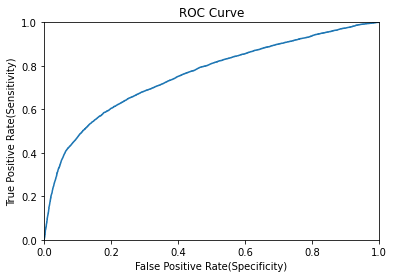

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

## Area Under Curve (AUC)
---

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7582524708677895

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_1 = []
for thres in thresholds:
    y_pred = np.where(predict1>thres,1,0)
    accuracy_1.append(accuracy_score(y,y_pred))
    
accuracy_1 = pd.concat([pd.Series(thresholds), pd.Series(accuracy_1)],axis=1)

accuracy_1.columns = ['Thresholds','Accuracy']
accuracy_1.sort_values(by='Accuracy',ascending=False, inplace=True)
accuracy_1.head(10)

,Thresholds,Accuracy
1600,0.450876,0.819333
1597,0.451492,0.819267
1599,0.451342,0.819267
1604,0.449562,0.819233
1605,0.449160,0.819233
1603,0.449874,0.819233
1598,0.451383,0.819233
1596,0.451699,0.819233
1606,0.449157,0.819200
1602,0.450093,0.819200


**Note:-**
 - Thershold value = 0.45 are optimum value for better accuracy but we have to choose a optimum threshold value with an improved specificity.

### Checking for Accuracy, Sensitivity and Specificity

In [ ]:
# Threshold value = 0.45 as the optimum value
threshold1 = 0.45
pred_1 = [0 if x < threshold1 else 1 for x in predict1]

# Creating Confusion Matrix
cm1 = confusion_matrix(y,pred_1)
print(cm1)

# Calculating accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy =',round(accuracy1*100,2))

# Calculating Sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity =',round(sensitivity1*100,2))

# Calculating Specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity =',round(specificity1*100,2))

[[22148  1216]
 [ 4207  2429]]
Accuracy = 81.92
Sensitivity = 94.8
Specificity = 36.6


- Specificity changed without changing the overall accuracy

In [ ]:
threshold2 = 0.3
pred_2 = [0 if x < threshold2 else 1 for x in predict1]

# Creating Confusion Matrix
cm2 = confusion_matrix(y,pred_2)
print(cm2)

# Calculating Accuracy
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print('Accuracy =',round(accuracy2*100,2))

# Calculating Sensitivity
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity =',round(sensitivity2*100,2))

# Calculating Specificity
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity =',round(specificity2*100,2))

[[20753  2611]
 [ 3359  3277]]
Accuracy = 80.1
Sensitivity = 88.82
Specificity = 49.38


- Specificity changed with slight change in overall accuracy

In [ ]:
threshold3 = 0.2
pred_3 = [0 if x < threshold3 else 1 for x in predict1]

# Creating Confusion Matrix
cm3 = confusion_matrix(y,pred_3)
print(cm3)

# Calculating Accuracy
total3 = sum(sum(cm3))
accuracy3 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy =',round(accuracy3*100,2))

# Calculating Sensitivity
sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity =',round(sensitivity3*100,2))

# Calculating Specificity
specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity =',round(specificity3*100,2))

[[18018  5346]
 [ 2461  4175]]
Accuracy = 73.98
Sensitivity = 77.12
Specificity = 62.91


- Significant change in specificity

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,pred_1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     23364
           1       0.67      0.37      0.47      6636

    accuracy                           0.82     30000
   macro avg       0.75      0.66      0.68     30000
weighted avg       0.80      0.82      0.80     30000



## Handling Class Imbalance
---

In [ ]:
uci_credit_card_v2 = uci_credit_card.copy()
uci_credit_card_v2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
uci_credit_card_v2.shape

(30000, 25)

In [ ]:
# Frequency count of Target variable
freq = uci_credit_card_v2['DEFAULT_PAYMENT'].value_counts()
print(freq)
print((freq/freq.sum())*100)

0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64
0    77.88
1    22.12
Name: DEFAULT_PAYMENT, dtype: float64


In [ ]:
# Classwise Data
uci_credit_class0 = uci_credit_card_v2[uci_credit_card_v2['DEFAULT_PAYMENT'] == 0]
uci_credit_class1 = uci_credit_card_v2[uci_credit_card_v2['DEFAULT_PAYMENT'] == 1]
print('Actual Class0 :',uci_credit_class0.shape)
print('Actual Class1 :',uci_credit_class1.shape)

Actual Class0 : (23364, 25)
Actual Class1 : (6636, 25)


### Oversampling and Undersampling

In [ ]:
# Undersampling of class0
# Consider 70% of the class0
uci_credit_class0_under = uci_credit_class0.sample(int(0.7*len(uci_credit_class0)))
print('Class0 Undersampling :', uci_credit_class0_under.shape)

Class0 Undersampling : (16354, 25)


In [ ]:
# Oversampling of class1
# Increase the size 2 times
uci_credit_class1_over = uci_credit_class1.sample(2*len(uci_credit_class1),replace=True)
print('Class1 Oversampling :', uci_credit_class1_over.shape)

Class1 Oversampling : (13272, 25)


In [ ]:
# Concatenate to create the final balanced data
uci_credit_balanced = pd.concat([uci_credit_class0_under,uci_credit_class1_over])
print('Final Balanced Data :',uci_credit_balanced.shape)

Final Balanced Data : (29626, 25)


In [ ]:
# Frequency count of Target variable in the balanced data
freq = uci_credit_balanced['DEFAULT_PAYMENT'].value_counts()
print(freq)
print((freq/freq.sum())*100)

0    16354
1    13272
Name: DEFAULT_PAYMENT, dtype: int64
0    55.201512
1    44.798488
Name: DEFAULT_PAYMENT, dtype: float64


### Model with Balanced data

In [ ]:
model_formula = "DEFAULT_PAYMENT ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6"

In [ ]:
import statsmodels.formula.api as sm
risk_model = sm.logit(model_formula, data=uci_credit_balanced)
results = risk_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.574569
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        DEFAULT_PAYMENT   No. Observations:                29626
Model:                          Logit   Df Residuals:                    29603
Method:                           MLE   Df Model:                           22
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.1645
Time:                        16:18:45   Log-Likelihood:                -17022.
converged:                       True   LL-Null:                       -20375.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0142      0.106     -0.134      0.893      -0.222       0.193
LIMIT_BAL  -1.281e-06   1.28e

In [ ]:
pred_balanced = results.predict()
pred_balanced

array([0.43740365, 0.22234031, 0.85865195, ..., 0.26873241, 0.29459041,
       0.52415041])

### Updated Sensitivity and Specificity

In [ ]:
thershold =0.5
predict_class1 = [ 0 if x < threshold else 1 for x in pred_balanced]

# Creating Confusion matrix
cm1 = confusion_matrix(uci_credit_balanced['DEFAULT_PAYMENT'],predict_class1)
print('Confusion Matrix :',cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :',round(accuracy1*100,2))

# Calculating Sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity :',round(sensitivity1*100,2))

# Calculating Specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity :', round(specificity1*100,2))

Confusion Matrix : [[14089  2265]
 [ 6156  7116]]
Accuracy : 71.58
Sensitivity : 86.15
Specificity : 53.62


### Updated Recall, Precision and F1 Score

In [ ]:
# from confusion matrix calculate accuracy
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :', accuracy1)

# Calculate the Recall, Precision and F1 score of Class0
Recall_class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_class0 :', Recall_class0)

Precision_class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 :', Precision_Class0)

F1_Class0 = 2/((1/Recall_Class0)+(1/Precision_Class0))
print('F1_Class0 :', F1_Class0)

# Calculate the Recall, Precision and F1 score of Class1
Recall_class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_class1 :', Recall_class1)

Precision_class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 :', Precision_Class1)

F1_Class1 = 2/((1/Recall_Class1)+(1/Precision_Class1))
print('F1_Class1 :', F1_Class1)

Accuracy : 0.715756430162695
Recall_class0 : 0.8615017732664791
Precision_Class0 : 0.8334261579875615
F1_Class0 : 0.8914980762070249
Recall_class1 : 0.5361663652802894
Precision_Class1 : 0.6813365933170334
F1_Class1 : 0.4334413480233312


### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(uci_credit_balanced['DEFAULT_PAYMENT'],predict_class1))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77     16354
           1       0.76      0.54      0.63     13272

    accuracy                           0.72     29626
   macro avg       0.73      0.70      0.70     29626
weighted avg       0.72      0.72      0.71     29626



## SMOTE Technique
---

In [ ]:
# Copy the cleaned data for further analysis
uci_credit_card_v3 = uci_credit_card.copy()
uci_credit_card_v3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
print('Actual Data :', uci_credit_card_v3.shape)

# Frequency count on target variable
freq = uci_credit_card_v3['DEFAULT_PAYMENT'].value_counts()
print(freq)
print((freq/freq.sum())*100)

# Classwise Data
uci_credit_class0 = uci_credit_card_v3[uci_credit_card_v3['DEFAULT_PAYMENT'] == 0]
uci_credit_class1 = uci_credit_card_v3[uci_credit_card_v3['DEFAULT_PAYMENT'] == 1]
print('Class0 Actual :', uci_credit_class0.shape)
print('Class1 Actual :', uci_credit_class1.shape)

Actual Data : (30000, 25)
0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64
0    77.88
1    22.12
Name: DEFAULT_PAYMENT, dtype: float64
Class0 Actual : (23364, 25)
Class1 Actual : (6636, 25)


### Visualizing Imbalanced Data before SMOTE

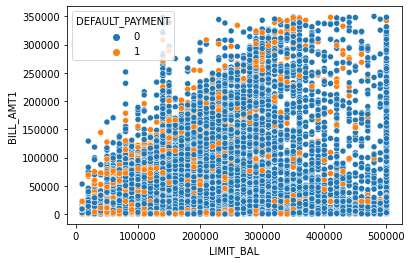

In [ ]:
sns.scatterplot(x = 'LIMIT_BAL', y = 'BILL_AMT1', data = uci_credit_card_v3, hue = 'DEFAULT_PAYMENT')

### SMOTE Function

In [ ]:
print(uci_credit_card_v3.columns)
x_train = uci_credit_card_v3.drop('DEFAULT_PAYMENT',axis=1)
y_train = uci_credit_card_v3['DEFAULT_PAYMENT']
print('X Train data :', x_train.shape)
print('Y Train data :', y_train.shape)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT'],
      dtype='object')
X Train data : (30000, 24)
Y Train data : (30000,)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.9, random_state = 50)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

import collections
print('Before SMOTE', collections.Counter(y_train))
print('After SMOTE', collections.Counter(y_train_smote))

Before SMOTE Counter({0: 23364, 1: 6636})
After SMOTE Counter({0: 23364, 1: 21027})


In [ ]:
# Creating the new dataset having the balanced data
uci_credit_smote = x_train_smote
uci_credit_smote['DEFAULT_PAYMENT'] = y_train_smote
uci_credit_smote.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Frequency count on target variable
freq = uci_credit_smote['DEFAULT_PAYMENT'].value_counts()
print(freq)
print((freq/freq.sum())*100)

0    23364
1    21027
Name: DEFAULT_PAYMENT, dtype: int64
0    52.63229
1    47.36771
Name: DEFAULT_PAYMENT, dtype: float64


### Visualizing Balanced data after SMOTE

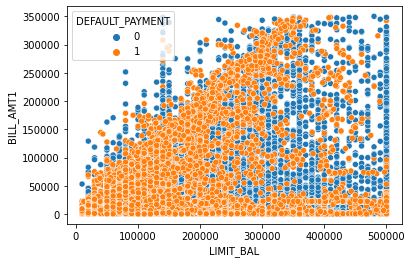

In [ ]:
sns.scatterplot(x = 'LIMIT_BAL', y = 'BILL_AMT1', data = uci_credit_smote, hue = 'DEFAULT_PAYMENT')

### Model with Balanced data

In [ ]:
model_formula = "DEFAULT_PAYMENT ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6"

In [ ]:
import statsmodels.formula.api as sm
risk_model = sm.logit(model_formula, data=uci_credit_smote)
results = risk_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.548919
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        DEFAULT_PAYMENT   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44368
Method:                           MLE   Df Model:                           22
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.2065
Time:                        16:18:54   Log-Likelihood:                -24367.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2416      0.088     48.054      0.000       4.069       4.415
LIMIT_BAL  -2.218e-06   1.09e

In [ ]:
pred_smote = results.predict()
pred_smote

array([0.84621607, 0.25764863, 0.19301324, ..., 0.88965922, 0.57971311,
       0.85383065])

In [ ]:
thershold =0.5
predicted_class1 = [ 0 if x < threshold else 1 for x in pred_smote]

# Creating Confusion matrix
cm1 = confusion_matrix(uci_credit_smote['DEFAULT_PAYMENT'],predicted_class1)
print('Confusion Matrix :',cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :',round(accuracy1*100,2))

# Calculating Sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity :',round(sensitivity1*100,2))

# Calculating Specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity :', round(specificity1*100,2))

Confusion Matrix : [[18396  4968]
 [ 6942 14085]]
Accuracy : 73.17
Sensitivity : 78.74
Specificity : 66.99


### Using Sklearn Logistic Regression

In [ ]:
# Defining the labels
X = uci_credit_smote.drop('DEFAULT_PAYMENT', axis=1)
print('X shape :', X.shape)
y = uci_credit_smote['DEFAULT_PAYMENT']
print('Y shape :', y.shape)

X shape : (44391, 24)
Y shape : (44391,)


In [ ]:
# Importing the packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=50)

logistic = LogisticRegression(solver = 'newton-cg', max_iter = 200)

# Fitting the model
logistic.fit(X_train,y_train)

# Predict
pred1_smote = logistic.predict(X_train)
pred1_smote


array([1, 0, 0, ..., 0, 1, 0])

### Updated Accuracy, Sensitivity and Specificity

In [ ]:
# Creating Confusion Matrix
cm1 = confusion_matrix(y_train,pred1_smote)
print(cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :', round(accuracy1*100,2))

# Calculating Sensitivity
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity :', round(sensitivity*100,2))

# Calculating Specificity
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity :', round(specificity*100,2))

[[14769  3912]
 [ 5551 11280]]
Accuracy : 73.35
Sensitivity : 79.06
Specificity : 67.02


### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(uci_credit_smote['DEFAULT_PAYMENT'],predicted_class1))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     23364
           1       0.74      0.67      0.70     21027

    accuracy                           0.73     44391
   macro avg       0.73      0.73      0.73     44391
weighted avg       0.73      0.73      0.73     44391



### Checking for Overfitting and Underfitting

In [ ]:
pred2_smote = logistic.predict(X_test)
pred2_smote

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
# Creating Confusion matrix
cm1 = confusion_matrix(y_train,pred1_smote)
print('Confusion matrix :', cm1)

# Calculating Train Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Train Accuracy :', round(accuracy1*100,2))

# Creating Confusion matrix
cm2 = confusion_matrix(y_test, pred2_smote)
print('Confusion matrix :', cm2)

# Calculating Test Accuracy
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print('Test Accuracy :', round(accuracy2*100,2))


Confusion matrix : [[14769  3912]
 [ 5551 11280]]
Train Accuracy : 73.35
Confusion matrix : [[3634 1049]
 [1318 2878]]
Test Accuracy : 73.34


- Accuracy on Train data and accuracy on Test data are matching, but Train data accuracy itself low. So the model is underfitting.

## Decision Tree
---

In [ ]:
# Defining the labels
X = uci_credit_smote.drop('DEFAULT_PAYMENT', axis=1)
y = uci_credit_smote['DEFAULT_PAYMENT']

In [ ]:
# Importing the packages
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=50)

# Checking the shape of the train and test data
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (35512, 24)
X_test : (8879, 24)
y_train : (35512,)
y_test : (8879,)


In [ ]:
# Building Tree Model
from sklearn import tree

# Consider max_depth as 8 for optimal value.
DTree = tree.DecisionTreeClassifier(max_depth = 8)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

|--- PAY_1 <= 0.50
|   |--- PAY_2 <= 0.50
|   |   |--- MARRIAGE <= 1.50
|   |   |   |--- SEX <= 1.50
|   |   |   |   |--- PAY_AMT2 <= 1998.67
|   |   |   |   |   |--- EDUCATION <= 2.50
|   |   |   |   |   |   |--- BILL_AMT1 <= 19644.50
|   |   |   |   |   |   |   |--- PAY_AMT4 <= 2885.33
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- PAY_AMT4 >  2885.33
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BILL_AMT1 >  19644.50
|   |   |   |   |   |   |   |--- LIMIT_BAL <= 87670.99
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- LIMIT_BAL >  87670.99
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- EDUCATION >  2.50
|   |   |   |   |   |   |--- LIMIT_BAL <= 95000.00
|   |   |   |   |   |   |   |--- ID <= 14766.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- ID >  14766.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- LI

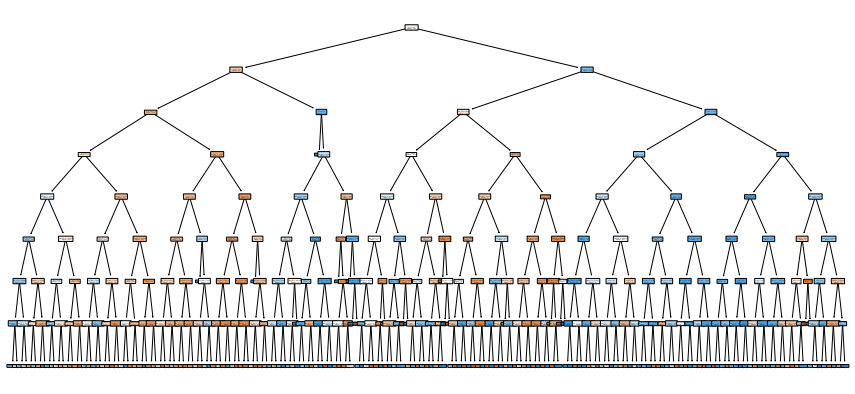

In [ ]:
# Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = list(X_train.columns))
print( export_text(DTree, feature_names = list(X_train.columns)))

In [ ]:
# Predicting the target variable using the test data
predict_dtree = DTree.predict(X_test)
predict_dtree

array([1, 1, 0, ..., 0, 1, 0])

### Tree Validation

In [ ]:
# Creating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,predict_dtree)
print('Confusion matrix :',cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Accuracy :', round(accuracy1*100,2))

# Calculating Sensitivity
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity :', round(sensitivity*100,2))

# Calculating Specificity
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity :', round(specificity*100,2))

Confusion matrix : [[3860  823]
 [1411 2785]]
Accuracy : 74.84
Sensitivity : 82.43
Specificity : 66.37


### Checking for Overfitting and Underfitting of Model

In [ ]:
# Predicting the target variable using the train data
pred_dtree = DTree.predict(X_train)
pred_dtree

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# Creating Confusion Matrix
cm1 = confusion_matrix(y_train,pred_dtree)
print('Confusion matrix :', cm1)

# Calculating Train accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Train Accuracy :', round(accuracy1*100,2))

Confusion matrix : [[15798  2883]
 [ 5580 11251]]
Train Accuracy : 76.17


In [ ]:
# Creating Confusion Matrix
cm2 = confusion_matrix(y_test,predict_dtree)
print('Confusion matrix :', cm2)

# Calculating Test accuracy
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print('Test Accuracy :', round(accuracy2*100,2))

Confusion matrix : [[3860  823]
 [1411 2785]]
Test Accuracy : 74.84


### K-Fold Cross Validation

In [ ]:
# simple k-fold validation, 10 folds.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(DTree,X,y,cv=kfold_models)
print(scores)
print('Avg K-fold Accuracy :',round(scores.mean()*100,2))

[0.2268018  0.71344897 0.71547646 0.72155891 0.75084478 0.75918
 0.41923857 0.67109709 0.702861   0.69610273]
Avg K-fold Accuracy : 63.77


## Random Forest
---

In [ ]:
# Defining the labels
X = uci_credit_smote.drop('DEFAULT_PAYMENT', axis=1)
y = uci_credit_smote['DEFAULT_PAYMENT']
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (44391, 24)
y shape : (44391,)


### Model Building

In [ ]:
# Importing the Packages
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=50)

# Checking the shape of the train and test data
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (35512, 24)
X_test : (8879, 24)
y_train : (35512,)
y_test : (8879,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, max_features=5, max_depth=10)
forest.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, max_features=5)

In [ ]:
# Predicting on Train data
pred_forest = forest.predict(X_train)
pred_forest

array([0, 0, 0, ..., 0, 1, 0])

### Confusion matrix, Accuracy for Train data and Test data

In [ ]:
# Importing Packages
from sklearn.metrics import confusion_matrix

# Creating Confusion matrix
cm1 = confusion_matrix(y_train,pred_forest)
print('Confusion matrix :', cm1)

# Calculating Accuracy
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print('Train Accuracy :', round(accuracy1*100,2))

Confusion matrix : [[16626  2055]
 [ 4601 12230]]
Train Accuracy : 81.26


In [ ]:
# Predicting on Test data
predict_forest = forest.predict(X_test)
predict_forest

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# Creating Confusion matrix
cm2 = confusion_matrix(y_test,predict_forest)
print('Confusion matrix :', cm2)

# Calculating Accuracy
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print('Test Accuracy :', round(accuracy2*100,2))

Confusion matrix : [[3970  713]
 [1249 2947]]
Test Accuracy : 77.9


## Boosting
---

In [ ]:
X = uci_credit_smote.drop('DEFAULT_PAYMENT', axis=1)
y = uci_credit_smote['DEFAULT_PAYMENT']

In [ ]:
# Importing the Packages
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=50)

# Checking the shape of the train and test data
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (35512, 24)
X_test : (8879, 24)
y_train : (35512,)
y_test : (8879,)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, verbose=1)

import time
##fitting the gradient boost classifier
start_time = time.time()
boost.fit(X_train,y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.3435           17.74s
         2           1.3095           17.71s
         3           1.2811           17.40s
         4           1.2563           17.34s
         5           1.2349           17.06s
         6           1.2163           16.90s
         7           1.1992           16.69s
         8           1.1851           16.70s
         9           1.1705           17.59s
        10           1.1582           18.21s
        20           1.0777           26.94s
        30           1.0381           23.07s
        40           1.0122           19.72s
        50           0.9923           16.48s
        60           0.9768           13.25s
        70           0.9656           10.18s
        80           0.9547            6.74s
        90           0.9464            3.34s
       100           0.9372            0.00s
Time taken by GBM 31.903095960617065 Seconds


### GBM Results

In [ ]:
# Predicting Gradient boosting model on the train Data
from sklearn.metrics import f1_score
boost_predict_train=boost.predict(X_train)
cm1 = confusion_matrix(y_train,boost_predict_train)
print(cm1)

accuracy_train=f1_score(y_train, boost_predict_train, average='micro') 
print("Train Accuracy", round(accuracy_train*100,2))

[[15768  2913]
 [ 4836 11995]]
Train Accuracy 78.18


In [ ]:
# Predicting Gradient boosting model on the test Data
boost_predict_test=boost.predict(X_test)
cm1 = confusion_matrix(y_test,boost_predict_test)
print(cm1)

accuracy_test=f1_score(y_test, boost_predict_test, average='micro') 
print("Test Accuracy", round(accuracy_test*100,2))

[[3880  803]
 [1192 3004]]
Test Accuracy 77.53


### XGB Model

In [ ]:
# Importing Packages
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing

In [ ]:
# Creating XGB Friendly data and matrices
train_labels = y_train.values
train_labels = preprocessing.LabelEncoder().fit_transform(train_labels)
test_labels = y_test.values
test_labels = preprocessing.LabelEncoder().fit_transform(test_labels)

matrix_train = xgboost.DMatrix(X_train,label=train_labels)
matrix_test = xgboost.DMatrix(X_test,label=test_labels)

In [ ]:
params = {
    'max_depth': 5, 
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
    'tree_method' : "hist", # use this with colab in gpu mode for faster training
    'num_class': 9
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=100,   
                    early_stopping_rounds=4, 
                    evals=[(matrix_test,'test')])

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.27199
Will train until test-merror hasn't improved in 4 rounds.
[1]	test-merror:0.263431
[2]	test-merror:0.259827
[3]	test-merror:0.252956
[4]	test-merror:0.246312
[5]	test-merror:0.245974
[6]	test-merror:0.244622
[7]	test-merror:0.241581
[8]	test-merror:0.240117
[9]	test-merror:0.237865
[10]	test-merror:0.236851
[11]	test-merror:0.237752
[12]	test-merror:0.237076
[13]	test-merror:0.2364
[14]	test-merror:0.235049
[15]	test-merror:0.235387
[16]	test-merror:0.235274
[17]	test-merror:0.235162
[18]	test-merror:0.233923
[19]	test-merror:0.232909
[20]	test-merror:0.232684
[21]	test-merror:0.232121
[22]	test-merror:0.231783
[23]	test-merror:0.230431
[24]	test-merror:0.230093
[25]	test-merror:0.229418
[26]	test-merror:0.22908
[27]	test-merror:0.228291
[28]	test-merror:0.228404
[29]	test-merror:0.227841
[30]	test-merror:0.22739
[31]	test-merror:0.226377
[32]	test-merror:0.226152
[33]	test-merror:0.225588
[34]	test-merror:0.225363
[35]	test-merror:0.225476
[36]	test-merror:0.22

### XGB Results

In [ ]:
# Prediction using XGB on the train Data
boost_predict_train=model.predict(matrix_train)
cm1 = confusion_matrix(train_labels,boost_predict_train)
print(cm1)

accuracy_train=f1_score(train_labels, boost_predict_train, average='micro') 
print("Train Accuracy :", round(accuracy_train*100,2))

[[16191  2490]
 [ 4310 12521]]
Train Accuracy : 80.85


In [ ]:
# Prediction using XGB on the test Data
boost_predict_test=model.predict(matrix_test)
cm1 = confusion_matrix(test_labels,boost_predict_test)
print(cm1)

accuracy_test=f1_score(test_labels, boost_predict_test, average='micro') 
print("Test Accuracy :", round(accuracy_test*100,2))

[[3935  748]
 [1117 3079]]
Test Accuracy : 79.0
